# Customer Churn Prediction for a Telecom Company using Logistic Regression

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_df = pd.read_csv("../data/ChurnData.csv")
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


<b>Data Preprocessing<b/>

In [3]:
# Selecting a subset of relevant features from the original churn dataset
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]

# Converting the target column 'churn' to integer type for classification
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df


,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


In [4]:
#Feature and Target Separation
# Defining input features X and target variable y
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]  # Display first 5 feature rows

y = np.asarray(churn_df['churn'])
y[0:5]  # Display first 5 target labels


array([1, 1, 0, 0, 0])

In [5]:
#Standardization of Feature Set
# Standardizing input features to have zero mean and unit variance
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]  # Display first 5 standardized feature rows


array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [6]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

<b>Logistic Regression Classifier modeling<b/>

In [9]:
LR=LogisticRegression().fit(X_train,y_train)

In [10]:
#predict the churn parameter for the test data set.
#predict the probability of each class.
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74658429, 0.25341571],
       [0.92677899, 0.07322101],
       [0.83445726, 0.16554274],
       [0.94596742, 0.05403258],
       [0.84351139, 0.15648861],
       [0.71452329, 0.28547671],
       [0.77085785, 0.22914215],
       [0.90956492, 0.09043508],
       [0.26142925, 0.73857075],
       [0.94907369, 0.05092631]])

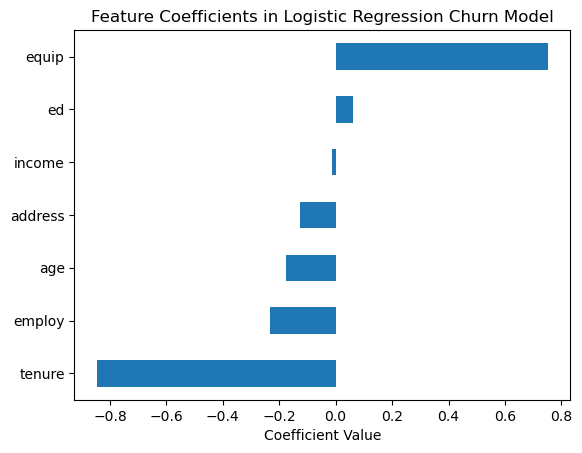

In [11]:
#prediction of class 1
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

<b>Performance Evaluation<b/>

In [12]:
#log loss
#The lower the log loss value, the better the model is.
log_loss(y_test, yhat_prob)

0.6258716651263538

# Add new feature to the original set of input features and calculate log loss

In [ ]:
# # Add a dummy 'callcard' feature with binary values (0 or 1)
# churn_df['callcard'] = np.random.randint(0, 2, size=len(churn_df))

# # Select input features including the new dummy 'callcard'
# churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'churn']]
# churn_df['churn'] = churn_df['churn'].astype('int')

In [20]:
# # Define input (X) and target (y)
# X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard']])
# y = np.asarray(churn_df['churn'])

# # Normalize the input features
# from sklearn.preprocessing import StandardScaler
# X_norm = StandardScaler().fit_transform(X)

# # Split, train, predict, and evaluate
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import log_loss

# # Train model
# LR = LogisticRegression()
# LR.fit(X_train, y_train)

# # Predict probabilities
# yhat_prob = LR.predict_proba(X_test)

# # Calculate log loss
# from sklearn.metrics import log_loss
# print("Log loss with 'callcard':", log_loss(y_test, yhat_prob))


Log loss with 'callcard': 0.6323385326309827


In [31]:
churn_df_d = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'churn']].copy()
churn_df_d['churn'] = churn_df_d['churn'].astype('int')

# Step 2: Define input and output
X = np.asarray(churn_df_d[['tenure', 'age', 'address', 'income', 'ed', 'employ']])
y = np.asarray(churn_df_d['churn'])

# Step 3: Normalize features
X_norm = StandardScaler().fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

# Step 5: Train logistic regression model
LR = LogisticRegression()
LR.fit(X_train, y_train)

# Step 6: Predict probabilities
yhat_prob = LR.predict_proba(X_test)

# Step 7: Evaluate log loss
print("Log loss without 'equip':", log_loss(y_test, yhat_prob))

Log loss without 'equip': 0.5303261925642377


In [32]:
#  Remove 'income' and 'employ', then evaluate log loss

# Step 1: Select features without 'income' and 'employ'
churn_df_e = churn_df[['tenure', 'age', 'address', 'ed', 'equip', 'churn']].copy()
churn_df_e['churn'] = churn_df_e['churn'].astype('int')

# Step 2: Define input (X) and target (y)
X = np.asarray(churn_df_e[['tenure', 'age', 'address', 'ed', 'equip']])
y = np.asarray(churn_df_e['churn'])

# Step 3: Normalize the input features
X_norm = StandardScaler().fit_transform(X)

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

# Step 5: Train the logistic regression model
LR = LogisticRegression()
LR.fit(X_train, y_train)

# Step 6: Predict probabilities
yhat_prob = LR.predict_proba(X_test)

# Step 7: Calculate log loss
from sklearn.metrics import log_loss
print("Log loss without 'income' and 'employ':", log_loss(y_test, yhat_prob))


Log loss without 'income' and 'employ': 0.6529909149226725
